Optimal coefficients: [1911.99893333 5394.42598263]
Сумма превышений графика: 0.0
Сумма не доставания графика: -8725693.2760369
Сумма превышений (по модулю): 0.0
Сумма не доставаний (по модулю): 8725693.2760369
Общая сумма (по модулю): 8725693.2760369
Количество совпадений: 0
Количество не совпадений: 5928
Процент совпадений: 0.00%
Процент не совпадений: 100.00%


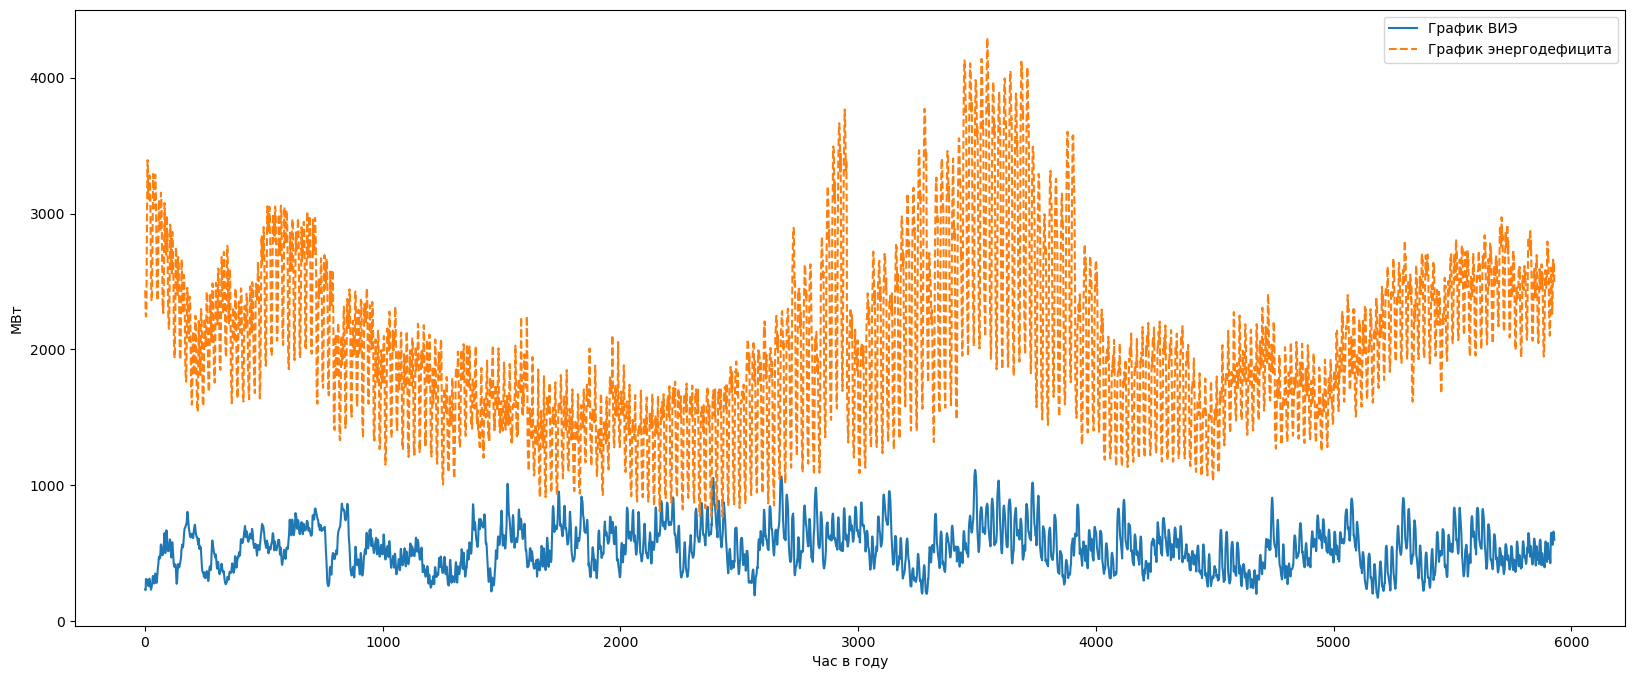

In [17]:
import openpyxl
import matplotlib.pyplot as plt
import numpy as np

# Открываем файл Excel
file_path = "C:/Diploma.xlsx"
workbook = openpyxl.load_workbook(file_path)

# Получаем лист с данными
sheet = workbook.worksheets[1]

# Получаем данные из трех столбцов
data_col_ses = np.array([float(cell.value) for cell in sheet['N'][1:5929] if cell.value is not None])
data_col_ves = np.array([float(cell.value) for cell in sheet['M'][1:5929] if cell.value is not None])
data_col_tec = np.array([float(cell.value) for cell in sheet['S'][1:5929] if cell.value is not None])

# Создаем матрицу данных
data_matrix = np.array([data_col_ses, data_col_ves])

# Находим оптимальные коэффициенты для объединения графиков
coefficients, residuals, _, _ = np.linalg.lstsq(data_matrix.T, data_col_tec, rcond=None)

# Объединяем графики с использованием найденных коэффициентов
combined_data = (
    coefficients[0] * data_col_ses +
    coefficients[1] * data_col_ves
)

# Задаем коэффициент уменьшения для combined_data
reduction_coefficient = 0.288  # Измените этот параметр по вашему усмотрению

# Уменьшаем combined_data на заданный коэффициент
combined_data *= reduction_coefficient

# Выводим оптимальные коэффициенты
print(f"Optimal coefficients: {coefficients}")

# Вычисляем отклонение от нужного графика
deviation = combined_data - data_col_tec

# Сумма превышений графика
excess_sum = np.sum(deviation[deviation > 0])

# Сумма не доставания графика
shortfall_sum = np.sum(deviation[deviation < 0])

# Сумма превышений (по модулю)
abs_excess_sum = np.sum(np.abs(deviation[deviation > 0]))

# Сумма не доставаний (по модулю)
abs_shortfall_sum = np.sum(np.abs(deviation[deviation < 0]))

# Общая сумма (по модулю)
total_abs_sum = np.sum(np.abs(deviation))

# Количество совпадений
match_count = np.sum(deviation == 0)

# Количество не совпадений
mismatch_count = len(deviation) - match_count

# Выводим результаты
print(f"Сумма превышений графика: {excess_sum}")
print(f"Сумма не доставания графика: {shortfall_sum}")
print(f"Сумма превышений (по модулю): {abs_excess_sum}")
print(f"Сумма не доставаний (по модулю): {abs_shortfall_sum}")
print(f"Общая сумма (по модулю): {total_abs_sum}")
print(f"Количество совпадений: {match_count}")
print(f"Количество не совпадений: {mismatch_count}")
print(f"Процент совпадений: {match_count / len(deviation) * 100:.2f}%")
print(f"Процент не совпадений: {mismatch_count / len(deviation) * 100:.2f}%")


# Задаем ширину графика
figure_width = 20  # Измените этот параметр по вашему усмотрению

# Создаем график
plt.figure(figsize=(figure_width, 8))  # Указываем ширину и высоту графика
plt.plot(range(1, 5929), combined_data, label="График ВИЭ")
plt.plot(range(1, 5929), data_col_tec, label="График энергодефицита", linestyle="--")

# Подписываем график
plt.title("")
plt.xlabel("Час в году")
plt.ylabel("МВт")

# Выводим легенду
plt.legend()

# Выводим график
plt.show()

# Закрываем файл Excel
workbook.close()